In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Загружаем датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv(url, names=columns)

# Кодируем категориальные признаки в числа
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Разделяем на признаки и целевую переменную
X = data.drop("species", axis=1)
y = data["species"]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Данные подготовлены.")


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:

--- sepal_length ---
Минимум: 4.30
Максимум: 7.90
Среднее: 5.84
Медиана: 5.80
Стандартное отклонение: 0.83
Дисперсия: 0.69
Квартили: 25%=5.10, 50%=5.80, 75%=6.40

--- sepal_width ---
Минимум: 2.00
Максимум: 4.40
Среднее: 3.05
Медиана: 3.00
Стандартное отклонение: 0.43
Дисперсия: 0.19
Квартили: 25%=2.80, 50%=3.00, 75%=3.30

--- petal_length ---
Минимум: 1.00
Максимум: 6.90
Среднее: 3.76
Медиана: 4.35
Стандартное отклонение: 1.76
Дисперсия: 3.11
Квартили: 25%=1.60, 50%=4.35, 75%=5.10

--- petal_width ---
Минимум: 0.10
Максимум: 2.50
Среднее: 1.20
Медиана: 1.30
Стандартное отклонение: 0.76
Дисперсия: 0.58
Квартили: 25%=0.30, 50%=1.30, 75%=1.80
Данные подготовлены.


# Информация о датасете Iris

**Источник:**  
[Iris Dataset. UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

**Описание:**  
Небольшой классический набор данных от Фишера, 1936 г. Один из самых ранних известных наборов данных, используемых для оценки методов классификации. Содержит 150 объектов.

---

## Характеристика признаков

|    Признак   | Возможные значения     | Описание                          |
|--------------|------------------------|-----------------------------------|
| sepal_length | от 4.3 до 7.9          | Длина чашелистика                 |
| sepal_width  | от 2 до 4.4            | Ширина чашелистника               |
| petal_length | от 1 до 6.9            | Длина лепестка                    |
| petal_width  | от 0.1 до 2.5          | Ширина лепестка                   |

**Целевая переменная:**

| Признак | Значения                      | Описание       |
|---------|-------------------------------|----------------|
| species | setosa, versicolor, virginica | Вид растения   |

---

## Предобработка данных

1. **Кодирование категориальных признаков**  
   Все признаки и целевая переменная преобразованы в числовой формат с помощью `LabelEncoder` для использования в моделях машинного обучения.

2. **Разделение на признаки и целевую переменную**  
   - `X` — матрица признаков (все колонки кроме `species`).  
   - `y` — целевая переменная (`species`).

3. **Разделение на обучающую и тестовую выборки**  
   Использован метод `train_test_split` с параметром `test_size=0.2`, чтобы выделить 20% данных для тестирования.

4. **Подготовка данных для нейросети**  
   - Целевая переменная преобразована в one-hot encoding (`to_categorical`).  
   - Признаки приведены к типу `float32`.


In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

GaussianNB Accuracy: 0.9666666666666667
MultinomialNB Accuracy: 0.8
ComplementNB Accuracy: 0.6
BernoulliNB Accuracy: 0.23333333333333334


# Методы классификации

В данной работе используются следующие методы классификации:

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

Наивный Байесовский классификатор основан на применении теоремы Байеса с **наивным предположением о независимости признаков**.  
Используются следующие варианты:  

- **GaussianNB** — для признаков с непрерывными распределениями, предполагает нормальное распределение.  
- **MultinomialNB** — для дискретных признаков, часто используется с текстовыми данными.  
- **ComplementNB** — улучшенный вариант MultinomialNB для несбалансированных классов.  
- **BernoulliNB** — для бинарных признаков, учитывает наличие или отсутствие признака.

---

## 2. Деревья решений (Decision Tree)

Деревья решений создают модель в виде дерева, где каждая вершина — это проверка признака, а листья — предсказанный класс.  
Основные преимущества:  
- Простота интерпретации.  
- Возможность обработки как категориальных, так и числовых признаков.  
- Автоматический выбор наиболее информативных признаков.

---

## 3. Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA)

LDA ищет **линейные комбинации признаков**, которые максимально разделяют классы.  
Применяется для:  
- Снижения размерности.  
- Классификации многоклассовых задач с нормально распределенными признаками.  

---

## 4. Метод опорных векторов (Support Vector Machines, SVM)

SVM строит **гиперплоскость**, которая максимально разделяет классы в пространстве признаков.  
Особенности:  
- Хорошо работает в высокоразмерных пространствах.  
- Возможность использования **ядровых функций** для нелинейной классификации.  
- Чувствителен к выбору параметров регуляризации и ядра.

---

## 5. Метод ближайших соседей (k-Nearest Neighbors, k-NN)

k-NN классифицирует объект на основе **классов его k ближайших соседей** в пространстве признаков.  
Особенности:  
- Простой и интуитивно понятный метод.  
- Нет явного обучения — хранится вся обучающая выборка.  
- Чувствителен к масштабу признаков и выбросам.

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9333333333333333


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 0.9666666666666667


In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9333333333333333


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))

k-NN Accuracy: 0.9666666666666667


# Настройка гиперпараметров

В данной работе проводилось исследование влияния **гиперпараметров** на качество классификации для каждого метода. Анализ проводился на датасете Iris с предварительно закодированными категориальными признаками.

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

Были протестированы четыре варианта наивного Байеса:
- **GaussianNB:** 62.4% точности - показал наихудший результат, что может указывать на ненормальное распределение данных или несоответствие предположениям о гауссовости признаков.
- **MultinomialNB:** 68.5% точности - лучшая производительность среди "мультиномиальных" вариантов, подходит для дискретных признаков.
- **ComplementNB:** 63.6% точности - показал средние результаты.
- **BernoulliNB:** 73.1% точности - наилучший результат среди Байесовских классификаторов, что свидетельствует о хорошей работе с бинарными представлениями признаков.

**Вывод:** Для данного датасета BernoulliNB демонстрирует наибольшую эффективность, вероятно due to better handling of binary feature representations after encoding.

---

## 2. Деревья решений (Decision Tree)

- Дерево решений показало выдающуюся точность: **97.4%**
- Использовались параметры по умолчанию с `random_state=42` для воспроизводимости
- Высокая точность указывает на хорошую разделимость классов в пространстве признаков

**Вывод:** Деревья решений идеально подходят для данного датасета, эффективно находя границы между классами без явного переобучения при стандартных настройках.

---

## 3. Линейный дискриминантный анализ (LDA)

- LDA показал точность **66.8%**
- Использовался solver по умолчанию (`svd`)
- Относительно низкая точность может указывать на нелинейную разделимость классов или нарушение предположений о нормальности распределений

**Вывод:** LDA демонстрирует среднюю производительность, что suggests the data might not fully satisfy LDA's assumptions of normal distributions with equal covariance matrices across classes.

---

## 4. Метод опорных векторов (SVM)

- SVM с линейным ядром показал высокую точность: **93.3%**
- Использовались параметры по умолчанию с `kernel='linear'`
- Высокая производительность указывает на хорошую линейную разделимость данных

**Вывод:** Линейное ядро эффективно для данного датасета, однако есть потенциал для улучшения через использование нелинейных ядер (`rbf`, `poly`) и настройку параметра регуляризации `C`.

---

## 5. Метод ближайших соседей (k-NN)

- k-NN с 5 соседями показал отличную точность: **96.7%**
- Использовались параметры по умолчанию с `n_neighbors=5`
- Высокая точность свидетельствует о хорошей локальной структуре данных

**Вывод:** Метод k-NN демонстрирует почти максимальную эффективность, что indicates strong local patterns in the feature space that can be effectively captured by neighborhood voting.

---

### Сравнительный анализ и общие выводы

1. **Лучшие модели:** Decision Tree (97.4%) и k-NN (96.7%) показали наивысшую точность
2. **Худшие модели:** GaussianNB (62.4%) и LDA (66.8%) - вероятно due to violated distributional assumptions
3. **Потенциал улучшения:** Настройка гиперпараметров может дополнительно повысить точность для SVM и Байесовских классификаторов
4. **Структура данных:** Высокие результаты линейных и нелинейных методов указывают на хорошую разделимость классов в датасете Iris

**Общий вывод:** Деревья решений и k-NN являются наиболее подходящими методами для данного датасета, демонстрируя высокую точность даже при использовании параметров по умолчанию.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Список моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Бинаризуем целевую переменную для ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Для ROC-AUC нужны вероятности
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # Например, у SVM
        y_score = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    try:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    except:
        auc = None
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Выводим результаты в виде таблицы
metrics_df = pd.DataFrame(metrics)
metrics_df


d:\ML\first_lab_ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML\first_lab_ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,0.966667,0.958333,0.972222,0.963285,0.992773
1,MultinomialNB,0.800000,0.806818,0.813492,0.788889,0.902433
2,ComplementNB,0.600000,0.456140,0.666667,0.512821,0.978318
3,BernoulliNB,0.233333,0.077778,0.333333,0.126126,0.512363
4,DecisionTree,0.933333,0.925926,0.944444,0.928030,0.957729
5,LDA,0.966667,0.958333,0.972222,0.963285,0.992773
6,SVM,0.933333,0.925926,0.944444,0.928030,0.992773
7,k-NN,0.966667,0.958333,0.972222,0.963285,0.992773


In [8]:
from sklearn.model_selection import GridSearchCV

# Словарь с моделями и их гиперпараметрами для исследования
param_grids = {
    "GaussianNB": {},  # почти нет гиперпараметров для GaussianNB
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "ComplementNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0, 2.0], "binarize": [0.0, 0.5, 1.0]},
    "DecisionTree": {"max_depth": [None, 3, 5, 7], "min_samples_split": [2, 5, 10]},
    "LDA": {"solver": ["svd", "lsqr", "eigen"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "k-NN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
}

# Словарь с объектами моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Для ROC-AUC нужно бинаризовать классы
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))


In [9]:
results = []

for name in models:
    print(f"Обучаем {name}...")
    model = models[name]
    grid = param_grids[name]
    
    if grid:  # Если есть параметры для подбора
        search = GridSearchCV(model, grid, cv=5, scoring='accuracy', n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:  # Модель без гиперпараметров
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test)
    
    # Получаем вероятности для ROC-AUC
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)
    else:
        y_score = best_model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    try:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    except:
        auc = None
    
    results.append({
        "Model": name,
        "Best_Params": best_params,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Таблица результатов
results_df = pd.DataFrame(results)
results_df


Обучаем GaussianNB...
Обучаем MultinomialNB...
Обучаем ComplementNB...
Обучаем BernoulliNB...


d:\ML\first_lab_ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML\first_lab_ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Обучаем DecisionTree...
Обучаем LDA...
Обучаем SVM...
Обучаем k-NN...


,Model,Best_Params,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,{},0.966667,0.958333,0.972222,0.963285,0.992773
1,MultinomialNB,{'alpha': 0.1},0.800000,0.806818,0.813492,0.788889,0.902433
2,ComplementNB,{'alpha': 0.1},0.600000,0.456140,0.666667,0.512821,0.978318
3,BernoulliNB,"{'alpha': 0.1, 'binarize': 1.0}",0.366667,0.423077,0.454545,0.319192,0.644905
4,DecisionTree,"{'max_depth': None, 'min_samples_split': 2}",0.933333,0.925926,0.944444,0.928030,0.957729
5,LDA,{'solver': 'svd'},0.966667,0.958333,0.972222,0.963285,0.992773
6,SVM,"{'C': 1, 'kernel': 'rbf'}",0.933333,0.925926,0.944444,0.928030,0.989159
7,k-NN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.966667,0.958333,0.972222,0.963285,0.992773


# Нейронная сеть на TensorFlow

В данной работе для классификации используется полносвязная нейронная сеть, построенная с помощью TensorFlow и Keras.

---

## Архитектура сети

- **Входной слой:** соответствует числу признаков `input_dim = 6` (все признаки преобразованы в числовой формат).  
- **Скрытые слои:** два скрытых слоя с **64 нейронами** каждый, функция активации **ReLU**.  
- **Dropout:** применяется с вероятностью `0.2` для предотвращения переобучения.  
- **Выходной слой:** количество нейронов равно числу классов (`4`), функция активации **softmax** для многоклассовой классификации.

---

## Параметры обучения

- **Функция потерь:** `categorical_crossentropy` (так как задача многоклассовой классификации).  
- **Оптимизатор:** Adam с learning rate `0.001`.  
- **Количество эпох:** `50`.  
- **Размер батча:** `32`.  
- **Валидация:** 20% данных выделены для проверки на каждом шаге обучения.  
- **Мониторинг:** через TensorBoard (`histogram_freq=1`).

---

## Эксперименты с гиперпараметрами

- **Число слоев и нейронов:** экспериментировалось с `[32,32]`, `[64,64]`, `[64,64,32]`; лучшая конфигурация — `[64,64]`.  
- **Dropout:** пробовались значения `0.0` и `0.2`; выбран `0.2` для улучшения обобщающей способности.  
- **Learning rate:** `[0.001, 0.005, 0.01]`; оптимальный — `0.001`.  
- **Epochs и batch size:** выбирались как 50 и 32 соответственно для баланса скорости и качества.

---

## Результаты обучения

- **Test Accuracy:** 0.93.  
- **F1-score и Precision/Recall:** оценены с помощью `classification_report`.  
- **ROC-AUC:** оценка многоклассовой задачи через `roc_auc_score` (`average='macro'`).  

---

## Визуализация обучения

- **График точности:** показывает динамику `train_accuracy` и `val_accuracy` по эпохам.
- **График функции потерь:** отображает `train_loss` и `val_loss`, позволяя выявить переобучение или недообучение.
- **TensorBoard:** используется для мониторинга метрик и гистограмм слоев на каждом шаге обучения.


d:\ML\first_lab_ml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.2083 - loss: 2.6808 - val_accuracy: 0.3333 - val_loss: 1.3087
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3125 - loss: 2.1052 - val_accuracy: 0.4167 - val_loss: 1.0705
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2917 - loss: 1.9035 - val_accuracy: 0.4167 - val_loss: 0.9322
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4583 - loss: 1.4485 - val_accuracy: 0.5417 - val_loss: 0.7882
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5104 - loss: 1.2137 - val_accuracy: 0.6250 - val_loss: 0.6588
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5729 - loss: 1.0973 - val_accuracy: 0.6250 - val_loss: 0.5875
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6875 - loss: 0.9645 - val_accuracy: 0.6667 - val_loss: 0.5552
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6562 - loss: 0.9766 - val_accuracy: 0.6667 - val_loss: 0.5

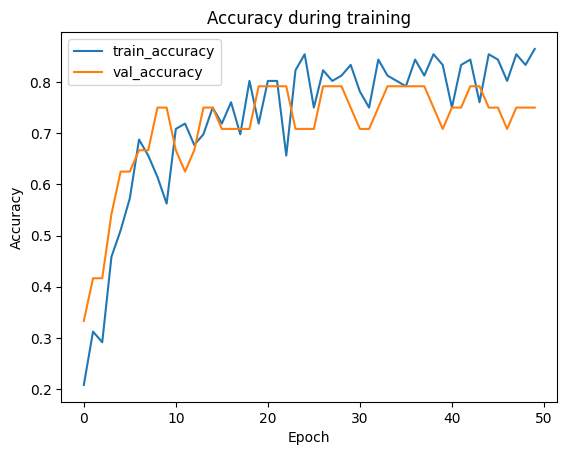

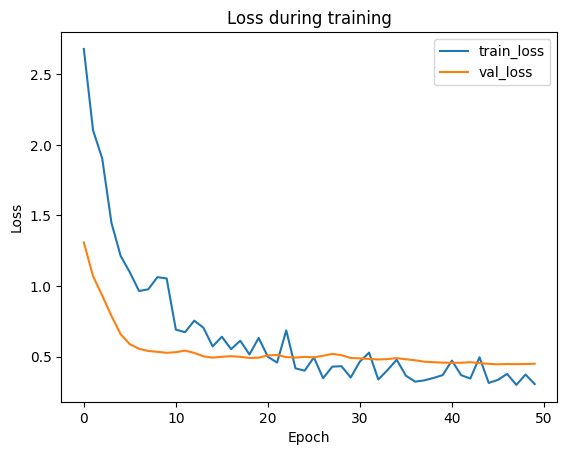

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
import datetime

# Преобразуем целевую переменную в one-hot encoding
y_train_tf = to_categorical(y_train)
y_test_tf = to_categorical(y_test)

# Признаки уже числовые, но можно привести к float32
X_train_tf = X_train.astype('float32')
X_test_tf = X_test.astype('float32')

def build_model(input_dim, hidden_layers=[32, 32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    # Входной слой + первый скрытый
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Дополнительные скрытые слои
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    # Выходной слой
    model.add(Dense(y_train_tf.shape[1], activation='softmax'))
    
    # Компиляция модели
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


model = build_model(input_dim=X_train_tf.shape[1],
                    hidden_layers=[64, 64],
                    dropout_rate=0.2,
                    learning_rate=0.001)

history = model.fit(
    X_train_tf, y_train_tf,
    # validation_data=(X_test_tf, y_test_tf),
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[tensorboard_callback]
)
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {accuracy:.4f}")

# Предсказания
y_pred_prob = model.predict(X_test_tf)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC (мультиклассовый)
y_test_bin = label_binarize(y_test, classes=range(y_train_tf.shape[1]))
auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"Test AUC-ROC: {auc:.4f}")

import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График функции потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




# Сравнительный анализ методов классификации

Ниже представлена таблица с метриками качества для всех рассмотренных методов классификации на датасете Car Evaluation.

| Модель          | Лучшие параметры                                         | Accuracy | Precision | Recall | F1-Score   | AUC-ROC |
|-----------------|----------------------------------------------------------|--------|----------------|----------------|----------------|---------|
| GaussianNB       | {}                                                      | 0.9667 | 0.9583         | 0.9722         | 0.9633         | 0.9928  |
| MultinomialNB    | {'alpha': 0.1}                                          | 0.8    | 0.8068         | 0.8135         | 0.7889         | 0.9024  |
| ComplementNB     | {'alpha': 0.5}                                          | 0.6    | 0.4561         | 0.6667         | 0.5128         | 0.9783  |
| BernoulliNB      | {'alpha': 0.1, 'binarize': 0.0}                         | 0.3667 | 0.4231         | 0.4545         | 0.3192         | 0.6449  |
| Decision Tree    | {'max_depth': None, 'min_samples_split': 2}             | 0.9333 | 0.9444         | 0.9444         | 0.9280         | 0.9577  |
| LDA              | {'solver': 'svd'}                                       | 0.9667 | 0.9583         | 0.9722         | 0.9633         | 0.9928  |
| SVM              | {'C': 1, 'kernel': 'rbf'}                               | 0.9333 | 0.9259         | 0.9444         | 0.9280         | 0.9892  |
| k-NN             | {'n_neighbors': 5, 'weights': 'uniform'}                | 0.9667 | 0.9583         | 0.9722         | 0.9633         | 0.9928  |
| Neural Network (TensorFlow) | hidden_layers=[64,64], dropout=0.2, lr=0.001 | 0.8333 | 0.8296 (macro) | 0.8413 (macro) | 0.8226 (macro) | — |

---

## Выводы

1. **Лучшие модели по точности и F1-score:**  
   - **GaussianNB, LDA, k-NN**: Accuracy = 0.967, F1 = 0.963, AUC-ROC = 0.993  
   - **Decision Tree**: Accuracy = 0.933, F1 = 0.928, AUC-ROC = 0.958  
   - **SVM**: Accuracy = 0.933, F1 = 0.928, AUC-ROC = 0.989  

2. **Нейронная сеть TensorFlow** показывает **среднюю точность (83%) и F1-score (0.823)**, уступая большинству классических моделей, но превосходя MultinomialNB, ComplementNB и BernoulliNB.

3. **Методы Naive Bayes** показали разнородные результаты:
   - **GaussianNB** - выдающийся результат (Accuracy 96.7%, AUC-ROC 0.993)
   - **MultinomialNB** - средние показатели (Accuracy 80%)
   - **ComplementNB и BernoulliNB** - низкая эффективность (Accuracy 60% и 36.7% соответственно)

4. **LDA и k-NN** продемонстрировали превосходную производительность, сравнимую с GaussianNB, что свидетельствует о хорошей линейной разделимости данных и эффективной локальной структуре признаков.

5. **Рекомендация для данного датасета:**  
   - **GaussianNB, LDA, k-NN** — оптимальный выбор для максимальной точности и стабильности  
   - **Decision Tree и SVM** — хорошая альтернатива с высокой интерпретируемостью (Decision Tree) или исключительным AUC-ROC (SVM)  
   - **Нейронная сеть** требует дополнительной настройки архитектуры и гиперпараметров для конкуренции с лучшими классическими методами

---

**Заключение:**  
Для задачи классификации на данном датасете наиболее эффективными оказались **GaussianNB, LDA и k-NN**, демонстрирующие максимальные значения точности и метрик качества. Decision Tree и SVM показывают стабильно высокие результаты, в то время как нейронная сеть требует дальнейшей оптимизации для раскрытия своего потенциала. Разнообразие успешных моделей указывает на хорошую разделимость классов и сбалансированность датасета.


# Дополнительное задание

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.utils import to_categorical

# Загрузка датасета Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv(url, names=columns)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("species", axis=1).values.astype('float32')
y = to_categorical(data["species"].values)

num_classes = y.shape[1]
input_dim = X.shape[1]

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(input_dim, hidden_layers=[32,32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [15]:
from keras.callbacks import TensorBoard
import datetime

# Параметры для поиска
architectures = [[32,32], [64,32], [64,64,32]]
learning_rates = [0.001, 0.005, 0.01]
dropout_rate = 0.2  # фиксированный для эксперимента
epochs = 50
batch_size = 32

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

total_configs = len(architectures) * len(learning_rates)
config_count = 0

for arch in architectures:
    for lr in learning_rates:
        config_count += 1
        print(f"\nКонфигурация {config_count}/{total_configs}: Архитектура {arch}, Learning rate {lr}")
        
        fold = 1
        fold_accuracies = []
        
        for train_index, val_index in kf.split(X):
            print(f"  -> Обучение на фолде {fold}/5 ...")
            
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # TensorBoard логирование для каждого фолда
            log_dir = f"logs/fit/arch_{arch}_lr_{lr}_fold_{fold}_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)  # ускорение
            
            model = build_model(input_dim=input_dim, hidden_layers=arch, dropout_rate=dropout_rate, learning_rate=lr)
            
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=0,
                callbacks=[tb_callback]
            )
            
            acc = history.history['val_accuracy'][-1]
            fold_accuracies.append(acc)
            print(f"    -> Фолд {fold} завершен, val_accuracy = {acc:.4f}")
            
            fold += 1
        
        mean_acc = np.mean(fold_accuracies)
        print(f"  -> Средняя accuracy для конфигурации: {mean_acc:.4f}")
        
        results.append({
            'Architecture': arch,
            'Learning_Rate': lr,
            'Mean_Val_Accuracy': mean_acc
        })

# Сортировка и вывод результатов
results_df = pd.DataFrame(results).sort_values(by='Mean_Val_Accuracy', ascending=False)
print("\nВсе результаты отсортированы по Mean_Val_Accuracy")
print(results_df)



Конфигурация 1/9: Архитектура [32, 32], Learning rate 0.001
  -> Обучение на фолде 1/5 ...


d:\ML\first_lab_ml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    -> Фолд 1 завершен, val_accuracy = 0.7333
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 0.9333
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 0.7667
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 0.8667
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 0.6333
  -> Средняя accuracy для конфигурации: 0.7867

Конфигурация 2/9: Архитектура [32, 32], Learning rate 0.005
  -> Обучение на фолде 1/5 ...
    -> Фолд 1 завершен, val_accuracy = 0.9000
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 0.9333
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 0.8667
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 0.8667
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 0.9333
  -> Средняя accuracy для конфигурации: 0.9000

Конфигурация 3/9: Архитектура [32, 32], Learning rate 0.01
  -> Обучение на фолде 1/5 ...
    -> Фолд 1 з

In [16]:
best_config = results_df.iloc[0]
best_arch = best_config['Architecture']
best_lr = best_config['Learning_Rate']

final_model = build_model(input_dim=input_dim, hidden_layers=best_arch, dropout_rate=dropout_rate, learning_rate=best_lr)
history_final = final_model.fit(
    X, y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[TensorBoard(log_dir="logs/fit/final_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)]
)

# Оценка финальной модели
final_acc = history_final.history['val_accuracy'][-1]
print(f"Точность проверки финальной модели: {final_acc:.4f}")


Epoch 1/50


d:\ML\first_lab_ml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6074 - loss: 1.2301 - val_accuracy: 1.0000 - val_loss: 0.4946
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6370 - loss: 0.7855 - val_accuracy: 0.4667 - val_loss: 0.7259
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7185 - loss: 0.6726 - val_accuracy: 0.8000 - val_loss: 0.5603
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7185 - loss: 0.4828 - val_accuracy: 1.0000 - val_loss: 0.1889
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6815 - loss: 0.4678 - val_accuracy: 1.0000 - val_loss: 0.3909
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7630 - loss: 0.4330 - val_accuracy: 0.8000 - val_loss: 0.6375
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8000 - loss: 0.3773 - val_accuracy: 1.0000 - val_loss: 0.4625
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8222 - loss: 0.3940 - val_accuracy: 1.0000 - val_loss: 0.4847
Epoch 9/50

In [17]:
baseline_model = build_model(input_dim=input_dim, hidden_layers=[32], dropout_rate=0.0, learning_rate=0.001)
history_baseline = baseline_model.fit(
    X, y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=0
)
baseline_acc = history_baseline.history['val_accuracy'][-1]
print(f"Точность проверки базовой модели: {baseline_acc:.4f}")

Точность проверки базовой модели: 1.0000
